In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

In [94]:
df = pd.read_csv('application_train.csv')

In [95]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [96]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
#Top ten variables including target variable
tv_df = df[['TARGET','NAME_HOUSING_TYPE', 'CNT_CHILDREN','NAME_TYPE_SUITE','NAME_FAMILY_STATUS','REGION_POPULATION_RELATIVE','CODE_GENDER','DAYS_EMPLOYED','OCCUPATION_TYPE','APARTMENTS_AVG','AMT_INCOME_TOTAL']]
tv_df.dropna()
tv_df.head()

,TARGET,NAME_HOUSING_TYPE,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,CODE_GENDER,DAYS_EMPLOYED,OCCUPATION_TYPE,APARTMENTS_AVG,AMT_INCOME_TOTAL
0,1,House / apartment,0,Unaccompanied,Single / not married,0.018801,M,-637,Laborers,0.0247,202500.0
1,0,House / apartment,0,Family,Married,0.003541,F,-1188,Core staff,0.0959,270000.0
2,0,House / apartment,0,Unaccompanied,Single / not married,0.010032,M,-225,Laborers,NaN,67500.0
3,0,House / apartment,0,Unaccompanied,Civil marriage,0.008019,F,-3039,Laborers,NaN,135000.0
4,0,House / apartment,0,Unaccompanied,Single / not married,0.028663,M,-3038,Core staff,NaN,121500.0


In [98]:
tv_df.dtypes

TARGET                          int64
NAME_HOUSING_TYPE              object
CNT_CHILDREN                    int64
NAME_TYPE_SUITE                object
NAME_FAMILY_STATUS             object
REGION_POPULATION_RELATIVE    float64
CODE_GENDER                    object
DAYS_EMPLOYED                   int64
OCCUPATION_TYPE                object
APARTMENTS_AVG                float64
AMT_INCOME_TOTAL              float64
dtype: object

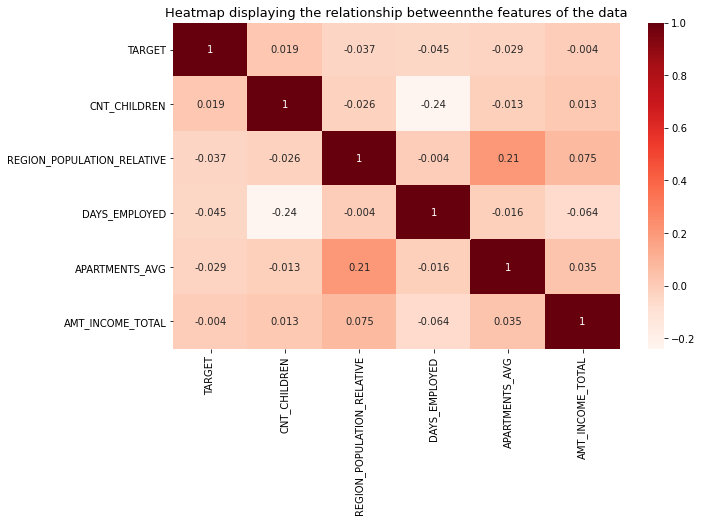

In [99]:
plt.figure(figsize=(10,6))
sns.heatmap(tv_df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

Text(0.5, 1.0, 'Difficulty with payments with Children')

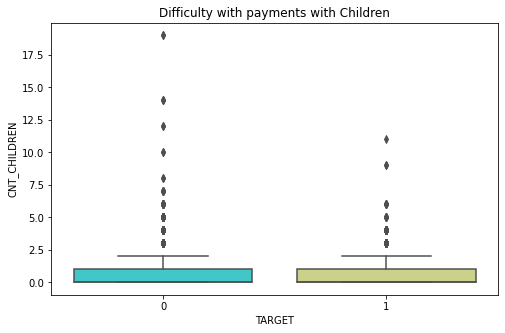

In [100]:
plt.figure(figsize=(8,5))
sns.boxplot(x=tv_df['TARGET'],y= tv_df['CNT_CHILDREN'],data=tv_df, palette='rainbow')
plt.title("Difficulty with payments with Children")

Text(0.5, 1.0, 'Violin Plot of Days employed by gender, Separated by payment difficulties')

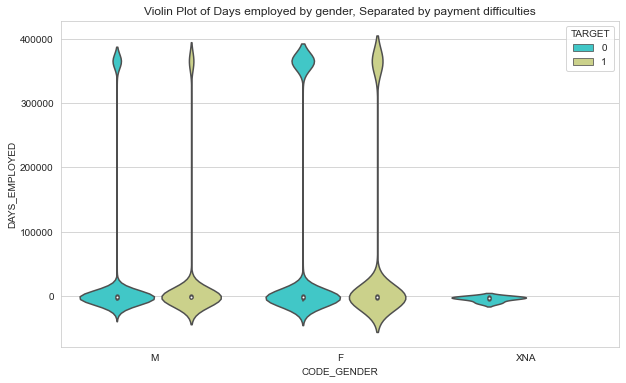

In [109]:
plt.figure(figsize=(10,6))
sns.violinplot(x=tv_df['CODE_GENDER'],y=tv_df["DAYS_EMPLOYED"],data=tv_df, hue=tv_df['TARGET'], palette='rainbow')
plt.title("Violin Plot of Days employed by gender, Separated by payment difficulties")

Text(0.5, 1.0, 'region population by payment difficulties, divided by occupation type')

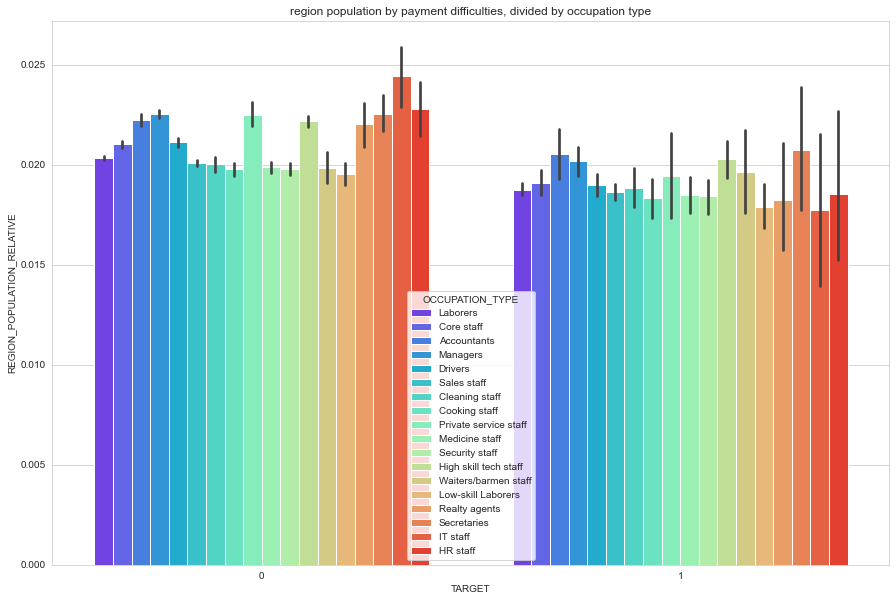

In [135]:
plt.figure(figsize=(15,10))
sns.barplot(x=tv_df['TARGET'],y=tv_df['REGION_POPULATION_RELATIVE'],data=tv_df, palette='rainbow', hue='OCCUPATION_TYPE')
plt.title("region population by payment difficulties, divided by occupation type")

Text(0.5, 1.0, 'income by payment difficulties, divided by Occupation type')

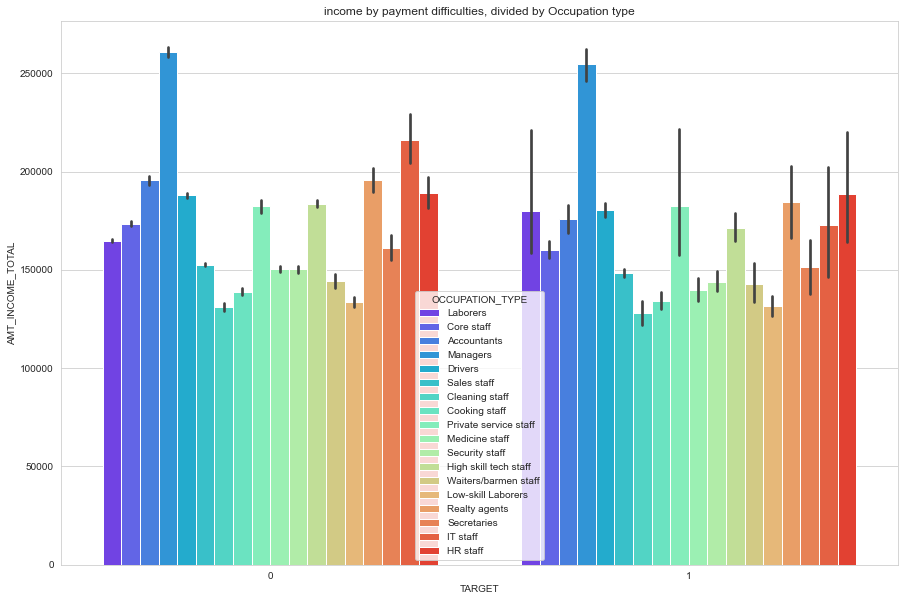

In [134]:
plt.figure(figsize=(15,10))
sns.barplot(x=tv_df['TARGET'],y=tv_df['AMT_INCOME_TOTAL'],data=tv_df, palette='rainbow', hue='OCCUPATION_TYPE')
plt.title("income by payment difficulties, divided by Occupation type")

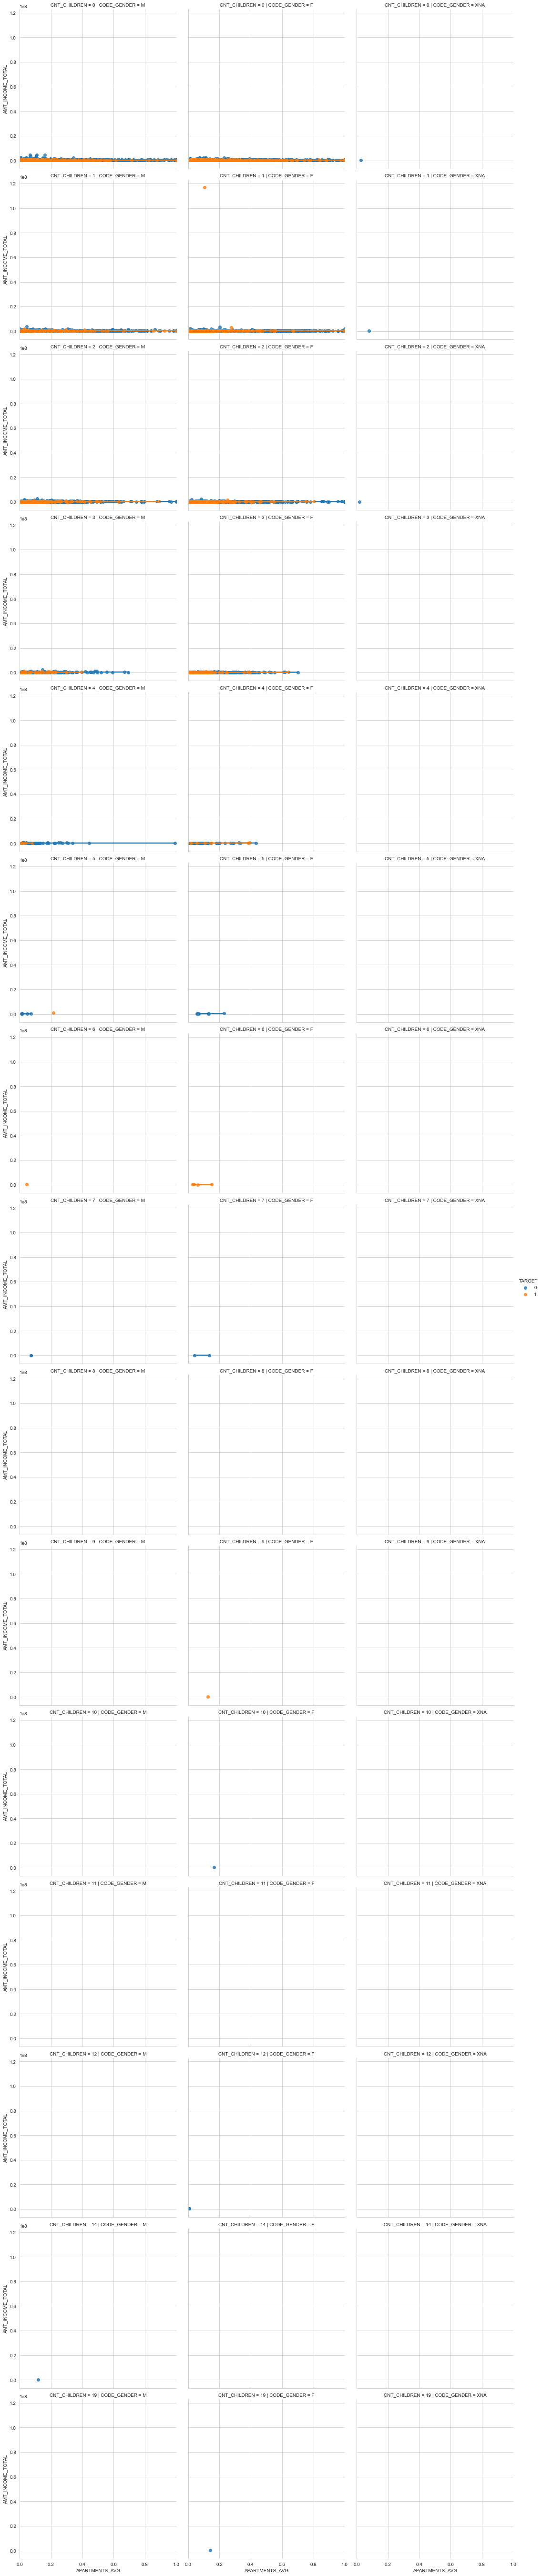

In [128]:
sns.lmplot(x ='APARTMENTS_AVG', y ='AMT_INCOME_TOTAL', data = tv_df, 
           col ='CODE_GENDER', row ='CNT_CHILDREN', hue ='TARGET')

Text(0.5, 1.0, 'Apartments average size by payment difficulties, divided by Gender')

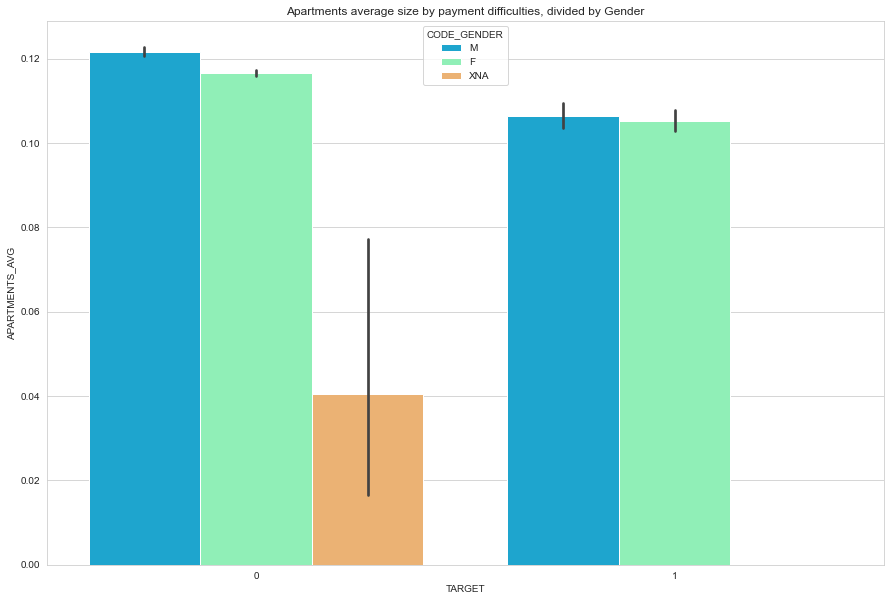

In [133]:
plt.figure(figsize=(15,10))
sns.barplot(x=tv_df['TARGET'],y=tv_df['APARTMENTS_AVG'],data=tv_df, palette='rainbow', hue='CODE_GENDER')
plt.title("Apartments average size by payment difficulties, divided by Gender")

Text(0.5, 1.0, 'Income by payment difficulties, divided by gender')

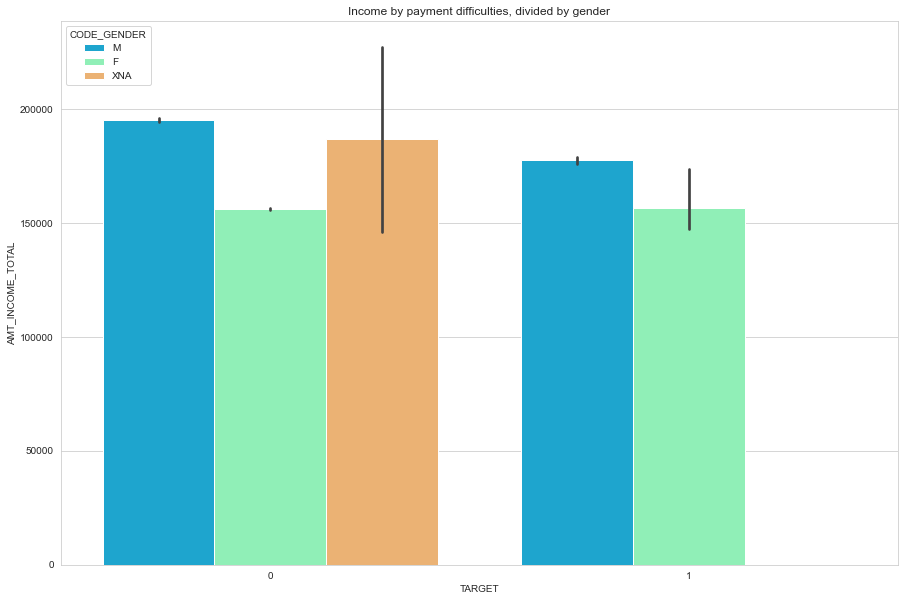

In [132]:
plt.figure(figsize=(15,10))
sns.barplot(x=tv_df['TARGET'],y=tv_df['AMT_INCOME_TOTAL'],data=tv_df, palette='rainbow', hue='CODE_GENDER')
plt.title("Income by payment difficulties, divided by gender")